**ASIAN DRAMA - ANALYSIS AND RECOMMENDATION**

**Aim and Objective:**

The aim of this project is to understand and visualize the trends in Asian shows including Korean, Chinese, Japan, Thailand and so on. The analysis includes the current pattern of these shows, increase in the viewership over the last two decades, impact of factors such as Network show is casted on, Genre of the show, Day of the week on which the show is aired and so on. The project concludes with a recommendation system which recommends new Korean Dramas to the user based on their choice of Genre or Actor or similar to their previously watched shows.

**Plan of action**

1. Data set of Asian dramas from kaggle:✅
2. Clean the data and prepare for analysis
3. Visualise important features: country vs shoes, rating vs country, content-rating, no.of episodes, time series analysis
4. Auto EDA libraries exploration
5. Analyse the importance of Original Network on show success
6. Understand No.of viewers, no.of rating, no.of reviews and rating
7. Load the Top-250 Korean Dramas data✅
8. Visulaise its metrics to understand factor behind its success
9. Analyse impact of Day of episode premiere on show sucess
10. Extract Kdrrama list from Wiki and take the user watch history (manual/netflix/any other)✅
11. Create a Recommendation system

**Introduction:**

The global popularity of Asian dramas and movies has been significantly influenced by the Korean Wave (Hallyu), a cultural phenomenon that has brought Korean entertainment, music, and fashion to the forefront of global attention. Originating in the late 1990s and early 2000s, the Korean Wave gained momentum with the rise of iconic dramas such as Winter Sonata and Boys Over Flowers, captivating international audiences with their compelling narratives, emotional depth, and high production quality. This cultural export has since expanded to include streaming platforms like Netflix and Viki, which have made Asian content, especially Korean dramas, accessible to viewers worldwide. The growing influence of Hallyu has also fueled interest in other Asian dramas and movies, fostering cross-cultural appreciation and a global fan base that transcends linguistic and geographical boundaries. This project explores these trends within the dataset, offering insights into how the Korean Wave and other cultural influences shape audience preferences and viewing habits.


In [ ]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the 5000 asian dramas from Kaggle which is extracted from MyDramaList
asian_dramas_5000 = pd.read_csv('/content/Top_5000_popular_drama_details_from_mydramalist.csv')
asian_dramas_5000.head()

,Unnamed: 0,name,content,no_of_reviews,no_of_viewers,aka_names,screenwriter,director,genres,tags,...,main_role,support_role,no_of_extracted_reviews,Total_sentences,POSITIVE_people_sentiment,POSITIVE_sentences,NEGATIVE_people_sentiment,NEGATIVE_sentences,reviewer_location_info,reviewer_gender_info
0,0,goblin,Kim Shin was once an unbeatable general in Gor...,464.0,198650.0,"쓸쓸하고 찬란하神-도깨비 , Dokkaebi , Sseulsseulhago Chal...",Kim Eun Sook,Lee Eung Bok,"Comedy, Romance, Fantasy, Melodrama","Supernatural, Older Man/Younger Woman, Intersp...",...,"Gong Yoo, Kim Go Eun, Lee Dong Wook, Yoo In Na...","Lee El, Kim Sung Kyum, Kim Byung Chul, Jo Woo...",422,6390,grim reaper - (sunny; bromance; shin; relation...,3226.0,"age gap - (lead; issue), grim reaper - (sunny)...",1331.0,"Counter({'': 238, 'usa': 14, 'united states': ...","Counter({'female': 318, '': 59, 'male': 44})"
1,1,strong woman do bong soon,"Do Bong Soon is a petite, unemployed woman who...",345.0,184710.0,"Himsseonyeoja Dobongsun , Powerful Woman Do Bo...",Baek Mi Kyung,Lee Hyung Min,"Action, Comedy, Romance, Supernatural","Strong Female Lead, Female Lead Action Scenes,...",...,"Park Bo Young, Park Hyung Sik, Kim Ji Soo","Jun Suk Ho, Shim Hye Jin, Yoo Jae Myung, Ahn W...",317,4615,female lead - (male; badass; amazing; characte...,2236.0,"serial killer - (plot; gangster), female lead,...",1235.0,"Counter({'': 197, 'united states': 10, 'usa': ...","Counter({'female': 228, '': 57, 'male': 32})"
2,2,weightlifting fairy kim bok joo,Bok Joo is a weightlifter who is pursuing her ...,267.0,167702.0,"Weightlifting Fairy Kim Bok-ju , Weightlifting...","Yang Hee Seung, Kim Soo Jin","Oh Hyun Jong, Nam Sung Woo","Comedy, Romance, Life, Sports","Friends To Lovers, Weightlifting, Strong Femal...",...,"Lee Sung Kyung, Nam Joo Hyuk, Lee Jae Yoon, Ky...","Cho Hye Jung, Lee Joo Young, Ji Il Joo, Yoo J...",246,3819,"love story - (character; beautiful), female le...",2139.0,"watch drama, female lead, male lead, character...",741.0,"Counter({'': 134, 'usa': 9, 'india': 4, 'phili...","Counter({'female': 176, '': 44, 'male': 26})"
3,3,descendants of the sun,A love story that develops between a surgeon a...,270.0,167287.0,"Taeyangeui Huye , The Sun's Descendants , Taey...","Kim Eun Sook, Kim Won Seok","Baek Sang Hoon, Lee Eung Bok","Action, Comedy, Romance, Melodrama","Hardworking Male Lead, Multiple Couples, Broma...",...,"Song Joong Ki, Song Hye Kyo, Jin Goo, Kim Ji Won","Lee Seung Joon, Seo Jung Yeon, Park Hwan Hee, ...",252,3728,"watch drama - (start; want; recommend), second...",1797.0,"watch drama - (time), female lead, last episod...",816.0,"Counter({'': 143, 'india': 8, 'usa': 6, 'unite...","Counter({'female': 193, '': 35, 'male': 24})"
4,4,w,"Oh Sung Moo, the father of cardiothoracic surg...",285.0,159860.0,"W – Two Worlds , W-두 개의 세계 , W – Two Worlds Apart",Song Jae Jung,Jeong Dae Yun,"Thriller, Comedy, Romance, Fantasy","Parallel Dimension, Gun Violence, Crossworlds ...",...,"Han Hyo Joo, Lee Jong Suk","Kim Eui Sung, Lee Tae Hwan, Jung Eugene, Lee S...",265,4664,"watch drama - (recommend), love story, really ...",1925.0,"second half - (drama), watch drama - (never), ...",1167.0,"Counter({'': 151, 'usa': 7, 'india': 6, 'phili...","Counter({'female': 196, '': 48, 'male': 21})"


In [ ]:
import re

# Function to clean and parse `reviewer_gender_info` column
def clean_and_parse_counter(counter_string):
    # Remove "Counter({" and "})" from the string
    cleaned_string = re.sub(r'Counter\(\{|\}\)', '', counter_string)
    # Split the string into key-value pairs
    items = [item.strip() for item in cleaned_string.split(',')]
    # Convert to a dictionary
    parsed_dict = {}
    for item in items:
        if ':' in item:
            key, value = item.split(':')
            parsed_dict[key.strip("'\" ")] = int(value.strip())
    return parsed_dict

# Apply the function and create new gender columns
asian_dramas_5000['reviewer_gender_dict'] = asian_dramas_5000['reviewer_gender_info'].apply(
    lambda x: clean_and_parse_counter(x) if isinstance(x, str) else {}
)
asian_dramas_5000['female_reviewers'] = asian_dramas_5000['reviewer_gender_dict'].apply(
    lambda x: x.get('female', 0)
)
asian_dramas_5000['male_reviewers'] = asian_dramas_5000['reviewer_gender_dict'].apply(
    lambda x: x.get('male', 0)
)
asian_dramas_5000['unknown_reviewers'] = asian_dramas_5000['reviewer_gender_dict'].apply(
    lambda x: x.get('', 0)
)

# Display the cleaned gender columns
asian_dramas_5000[['female_reviewers', 'male_reviewers', 'unknown_reviewers']].head()


,female_reviewers,male_reviewers,unknown_reviewers
0,318,44,59
1,228,32,57
2,176,26,44
3,193,24,35
4,196,21,48


In [ ]:
# Drop the unnecessary columns
asian_dramas_5000 = asian_dramas_5000.drop(['reviewer_gender_info', 'reviewer_gender_dict'], axis=1)

# Verify the columns are removed
asian_dramas_5000.head()

,Unnamed: 0,name,content,no_of_reviews,no_of_viewers,aka_names,screenwriter,director,genres,tags,...,no_of_extracted_reviews,Total_sentences,POSITIVE_people_sentiment,POSITIVE_sentences,NEGATIVE_people_sentiment,NEGATIVE_sentences,reviewer_location_info,female_reviewers,male_reviewers,unknown_reviewers
0,0,goblin,Kim Shin was once an unbeatable general in Gor...,464.0,198650.0,"쓸쓸하고 찬란하神-도깨비 , Dokkaebi , Sseulsseulhago Chal...",Kim Eun Sook,Lee Eung Bok,"Comedy, Romance, Fantasy, Melodrama","Supernatural, Older Man/Younger Woman, Intersp...",...,422,6390,grim reaper - (sunny; bromance; shin; relation...,3226.0,"age gap - (lead; issue), grim reaper - (sunny)...",1331.0,"Counter({'': 238, 'usa': 14, 'united states': ...",318,44,59
1,1,strong woman do bong soon,"Do Bong Soon is a petite, unemployed woman who...",345.0,184710.0,"Himsseonyeoja Dobongsun , Powerful Woman Do Bo...",Baek Mi Kyung,Lee Hyung Min,"Action, Comedy, Romance, Supernatural","Strong Female Lead, Female Lead Action Scenes,...",...,317,4615,female lead - (male; badass; amazing; characte...,2236.0,"serial killer - (plot; gangster), female lead,...",1235.0,"Counter({'': 197, 'united states': 10, 'usa': ...",228,32,57
2,2,weightlifting fairy kim bok joo,Bok Joo is a weightlifter who is pursuing her ...,267.0,167702.0,"Weightlifting Fairy Kim Bok-ju , Weightlifting...","Yang Hee Seung, Kim Soo Jin","Oh Hyun Jong, Nam Sung Woo","Comedy, Romance, Life, Sports","Friends To Lovers, Weightlifting, Strong Femal...",...,246,3819,"love story - (character; beautiful), female le...",2139.0,"watch drama, female lead, male lead, character...",741.0,"Counter({'': 134, 'usa': 9, 'india': 4, 'phili...",176,26,44
3,3,descendants of the sun,A love story that develops between a surgeon a...,270.0,167287.0,"Taeyangeui Huye , The Sun's Descendants , Taey...","Kim Eun Sook, Kim Won Seok","Baek Sang Hoon, Lee Eung Bok","Action, Comedy, Romance, Melodrama","Hardworking Male Lead, Multiple Couples, Broma...",...,252,3728,"watch drama - (start; want; recommend), second...",1797.0,"watch drama - (time), female lead, last episod...",816.0,"Counter({'': 143, 'india': 8, 'usa': 6, 'unite...",193,24,35
4,4,w,"Oh Sung Moo, the father of cardiothoracic surg...",285.0,159860.0,"W – Two Worlds , W-두 개의 세계 , W – Two Worlds Apart",Song Jae Jung,Jeong Dae Yun,"Thriller, Comedy, Romance, Fantasy","Parallel Dimension, Gun Violence, Crossworlds ...",...,265,4664,"watch drama - (recommend), love story, really ...",1925.0,"second half - (drama), watch drama - (never), ...",1167.0,"Counter({'': 151, 'usa': 7, 'india': 6, 'phili...",196,21,48


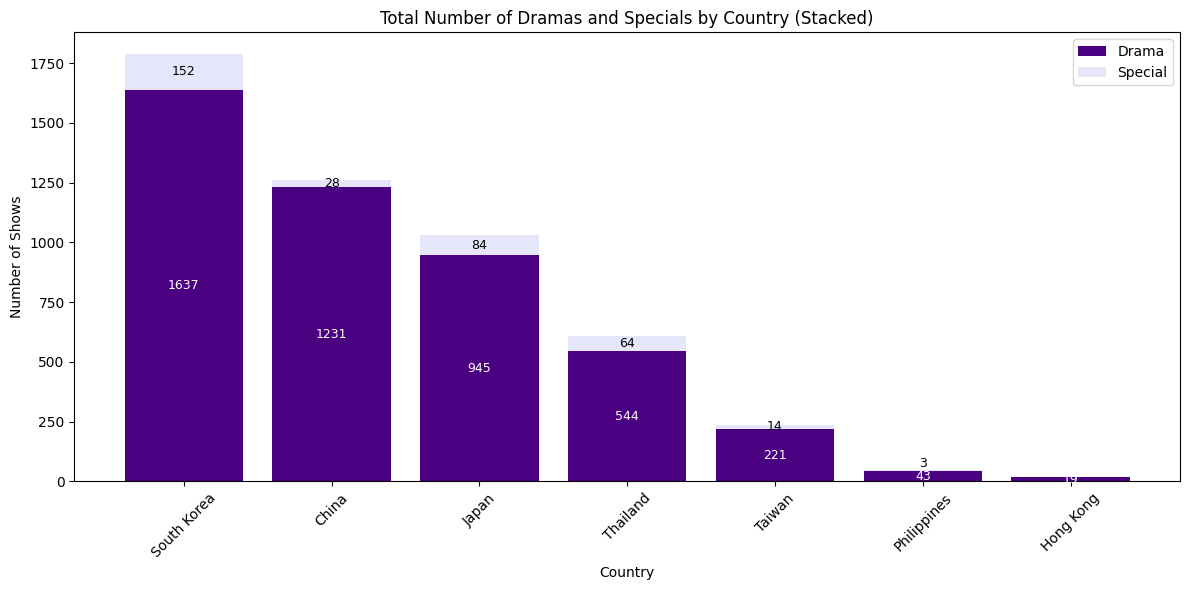

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Count the number of Dramas and Specials by country
country_type_counts = asian_dramas_5000.groupby(['country', 'type_of_show']).size().unstack(fill_value=0)

# Separate the counts for Drama and Special
drama_counts = country_type_counts['Drama']
special_counts = country_type_counts['Special']

# Sort by total shows in descending order
sorted_countries = (drama_counts + special_counts).sort_values(ascending=False).index
drama_counts = drama_counts[sorted_countries]
special_counts = special_counts[sorted_countries]

# Create the positions for the bars
x = range(len(sorted_countries))

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x, drama_counts, label='Drama', color='#4B0082')  # Dark purple (indigo)
bars2 = plt.bar(x, special_counts, bottom=drama_counts, label='Special', color='#E6E6FA')  # Pale purple (lavender)

# Add the numbers for each portion with dynamic positioning
for i in range(len(x)):
    # Drama count
    if drama_counts.iloc[i] > 0:  # Add text only if Drama count is non-zero
        if drama_counts.iloc[i] > 5:  # If bar height is large enough, display inside
            plt.text(
                x[i], drama_counts.iloc[i] / 2,
                int(drama_counts.iloc[i]),
                ha='center', va='center', color='white', fontsize=9
            )
        else:  # For small bars, display text above the bar
            plt.text(
                x[i], drama_counts.iloc[i] + 1,
                int(drama_counts.iloc[i]),
                ha='center', va='bottom', color='black', fontsize=9
            )

    # Special count
    if special_counts.iloc[i] > 0:  # Add text only if Special count is non-zero
        if special_counts.iloc[i] > 5:  # If bar height is large enough, display inside
            plt.text(
                x[i], drama_counts.iloc[i] + special_counts.iloc[i] / 2,
                int(special_counts.iloc[i]),
                ha='center', va='center', color='black', fontsize=9
            )
        else:  # For small bars, display text above the bar
            plt.text(
                x[i], drama_counts.iloc[i] + special_counts.iloc[i] + 1,
                int(special_counts.iloc[i]),
                ha='center', va='bottom', color='black', fontsize=9
            )

# Add labels, title, and legend
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.title('Total Number of Dramas and Specials by Country (Stacked)')
plt.xticks(x, sorted_countries, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


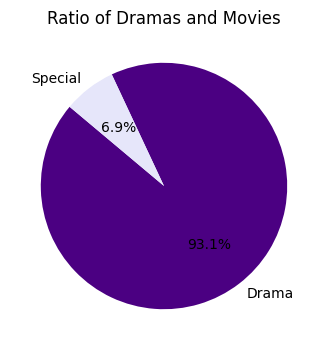

In [ ]:
import matplotlib.pyplot as plt

# Check if the 'type_of_show' column exists in the dataset
if 'type_of_show' in asian_dramas_5000.columns:
    # Count the occurrences of each type (e.g., Drama, Movie)
    type_counts = asian_dramas_5000['type_of_show'].value_counts()

    # Define custom colors in shades of purple
    colors = ['#4B0082', '#E6E6FA']  # Dark purple for Drama, pale purple for Special/Movie

    # Plot the pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('Ratio of Dramas and Movies')
    plt.show()
else:
    print("Column 'type_of_show' not found in the dataset.")



In [ ]:
import pandas as pd
import plotly.express as px

# Group the data by country and year, and count the number of shows
shows_per_country_year = (
    asian_dramas_5000.groupby(['country', 'year']).size().reset_index(name='count')
)

# Filter the data to include only years from 1994 onwards
shows_per_country_year = shows_per_country_year[shows_per_country_year['year'] >= 1994]

# Create an interactive line chart
fig = px.line(
    shows_per_country_year,
    x='year',  # X-axis
    y='count',  # Y-axis
    color='country',  # Line colors based on country
    title='Number of Shows Per Country Per Year (From 1994)',
    labels={'year': 'Year', 'count': 'Number of Shows', 'country': 'Country'},
)

# Update layout for better readability
fig.update_layout(
    hovermode='x unified',  # Show hover information for all countries at once
    legend_title_text='Country',
    xaxis=dict(title='Year', tickmode='linear', range=[1994, shows_per_country_year['year'].max()]),  # Adjust range
    yaxis=dict(title='Number of Shows'),
)

# Show the interactive chart
fig.show()


can notice that korean wave began before the chinese, korean in 2010 while chinese and thai in 2016-17


In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 41.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import sweetviz as sv

# Create the Sweetviz report
eda_report = sv.analyze(asian_dramas_5000)

# Save the report
eda_report.show_html("asian_dramas_eda_report.html")


                                             |          | [  0%]   00:00 -> (? left)

Report asian_dramas_eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
